# Sample Patch

In [1]:
def sample_patch(x, y, gridstartx, gridstarty, im_shape, patch_sz, gap, noisehalf):
    xpix = gridstartx + x * (patch_sz[1] + gap) + random.randint(-noisehalf, noisehalf)
    xpix2 = min(max(xpix, 0), im_shape[1] - patch_sz[1])
    ypix = gridstarty + y * (patch_sz[0] + gap) + random.randint(-noisehalf, noisehalf)
    ypix2 = min(max(ypix, 0), im_shape[0] - patch_sz[0])
    assert abs(xpix - xpix2) < gap
    assert abs(ypix - ypix2) < gap
    return (xpix2 , ypix2)

def pos2lbl(pos):
    posx, posy =pos
    if(posy==-1):
        lbl = posx + 1
    elif(posy == 0):
        lbl = (posx + 7) / 2
    else:
        assert(posy == 1)
        lbl = posx + 6
    return lbl

Sample patch works only images that has more than 73728 pixels.
- [x] Draw green rectangle with no gap/jitter.
- [x] Draw blue rectangle with gap/jitter (= every possible positions of the blue patch).
    - [x] Draw one blue patch of size 96x96.(Since we add jitter, we only have to add jitter to square that are in in the diagonals of the blue square)
- [x] Draw 8 red squares with gap/jitter (= every possible positions of red patches relative to the blue patch).
    - [x] Draw 8 squares with gap.
    - [ ] Add jitter for squares in the diagonal (jitter should be towards the blue patch).

(600, 800, 3)


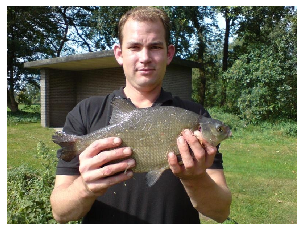

In [102]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np 

img = cv2.imread("img/fish.JPEG")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

patch_sz = (96,96)
gap = 48
jitter = 7
x, y, _ = img.shape 
print(img.shape)

(-0.5, 799.5, 599.5, -0.5)

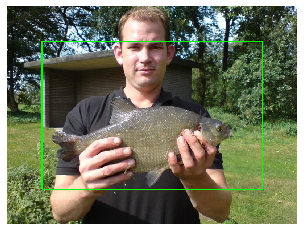

In [92]:
# Draw green rectangle with no gap/jitter.
topL_x, topL_y = patch_sz 
botR_x, botR_y = x - patch_sz[0],  y - patch_sz[1]

plt.imshow(cv2.cvtColor(cv2.rectangle(img, (topL_y, topL_x), (botR_y, botR_x), (0,255,0), 2), cv2.COLOR_BGR2RGB))
plt.axis('off')

151 151
449 649


(-0.5, 799.5, 599.5, -0.5)

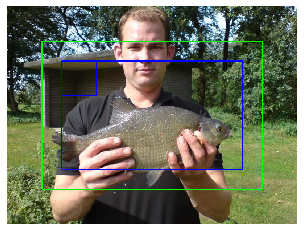

In [96]:
# Draw blue rectangle with gap/jitter (= every possible positions of the blue patch).
topL_x, topL_y = (patch_sz[0] + gap + jitter), (patch_sz[1] + gap + jitter) 
botR_x, botR_y = (x - patch_sz[0] - gap - jitter), (y - patch_sz[1] - gap - jitter)

plt.imshow(cv2.cvtColor(cv2.rectangle(img, (topL_y, topL_x), (botR_y, botR_x), (255,0,0), 2), cv2.COLOR_BGR2RGB))

print(topL_x, topL_y)
print(botR_x, botR_y)

# Draw one blue patch of size 96x96.
plt.imshow(cv2.cvtColor(cv2.rectangle(img, (topL_y, topL_x), (topL_y + patch_sz[1], topL_x + patch_sz[0]), (255,0,0), 2), cv2.COLOR_BGR2RGB))
plt.axis('off')

In [97]:
# REALLY IMPORTANT.

#plt.imshow(cv2.cvtColor(img[151:449, 151:649, ...], cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(img[topL_x:botR_x, topL_y:botR_y, ...], cv2.COLOR_BGR2RGB))

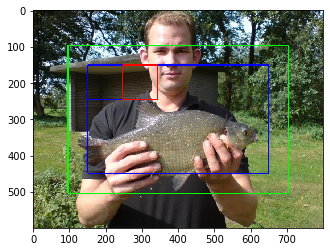

In [98]:
plt.imshow(cv2.cvtColor(cv2.rectangle(img, (topL_y+ patch_sz[0], topL_x), (topL_y + patch_sz[1] + patch_sz[1] , topL_x + patch_sz[0]), (0,0,255), 2), cv2.COLOR_BGR2RGB))

(600, 800, 3)


(-0.5, 799.5, 599.5, -0.5)

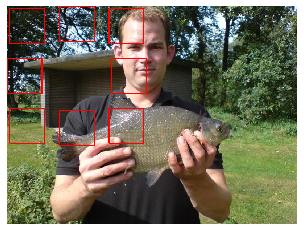

In [137]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np 

img = cv2.imread("img/fish.JPEG")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

patch_sz = (96,96)
gap = 48
jitter = 7
x, y, _ = img.shape 
print(img.shape)

# Draw 8 rectangles with gap + jitter for diagonal.
topL_x, topL_y = 0, 0
botR_x, botR_y = patch_sz[0], patch_sz[1]

for i in range(1, 10):
    # Add jitter to diagonal case.
    if i == 1:
        cv2.rectangle(img, (topL_y+jitter, topL_x+jitter), (botR_y+jitter, botR_x+jitter), (0,0,255), 2)
    elif i == 3:
        cv2.rectangle(img, (topL_y-jitter, topL_x+jitter), (botR_y-jitter, botR_x+jitter), (0,0,255), 2)
    elif i == 7:
        cv2.rectangle(img, (topL_y+jitter, topL_x-jitter), (botR_y+jitter, botR_x-jitter), (0,0,255), 2)
    elif i == 9:
        cv2.rectangle(img, (topL_y-jitter, topL_x-jitter), (botR_y-jitter, botR_x-jitter), (0,0,255), 2)
    elif i != 5: # Case: red patch = blue patch.
        cv2.rectangle(img, (topL_y, topL_x), (botR_y, botR_x), (0,0,255), 2)
    
    topL_y += patch_sz[1] + gap
    botR_y += patch_sz[1] + gap
    
    # New line after 3 consecutives squares.
    if i % 3 == 0:
        topL_y = 0
        botR_y = patch_sz[1]
        
        topL_x += patch_sz[0] + gap
        botR_x += patch_sz[0] + gap
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

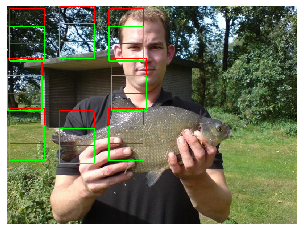

In [138]:
# Draw 8 rectangles with gap + jitter for diagonal.
topL_x, topL_y = gap, 0
botR_x, botR_y = patch_sz[0] + gap, patch_sz[1]

for i in range(1, 10):
    # Add jitter to diagonal case.
    if i == 1:
        cv2.rectangle(img, (topL_y+jitter, topL_x+jitter), (botR_y+jitter, botR_x+jitter), (0,255,0), 2)
    elif i == 3:
        cv2.rectangle(img, (topL_y-jitter, topL_x+jitter), (botR_y-jitter, botR_x+jitter), (0,255,0), 2)
    elif i == 7:
        cv2.rectangle(img, (topL_y+jitter, topL_x-jitter), (botR_y+jitter, botR_x-jitter), (0,255,0), 2)
    elif i == 9:
        cv2.rectangle(img, (topL_y-jitter, topL_x-jitter), (botR_y-jitter, botR_x-jitter), (0,255,0), 2)
    elif i != 5: # Case: red patch = blue patch.
        cv2.rectangle(img, (topL_y, topL_x), (botR_y, botR_x), (0,255,0), 2)
    
    topL_y += patch_sz[1] + gap
    botR_y += patch_sz[1] + gap
    
    # New line after 3 consecutives squares.
    if i % 3 == 0:
        topL_y = 0
        botR_y = patch_sz[1]
        
        topL_x += patch_sz[0] + gap
        botR_x += patch_sz[0] + gap
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# AlexNet2 Class

In [7]:
# class AlexNetD(layers.Layer):
    
#     def __init__(self):
#         super(AlexNetD, self).__init__()
         
#         self.conv1 = Conv2D(filters=96, 
#                             kernel_size=(11, 11),
#                             strides=4,
#                             padding='same',
#                             activation='relu',
#                             name='conv1')
#         self.pool1 = MaxPooling2D(pool_size=3,
#                                   strides=2)
#         self.bn1 = BatchNormalization()
        
#         self.conv2 = Conv2D(filters=256, 
#                             kernel_size=(5, 5),
#                             strides=1,
#                             padding='same',
#                             activation='relu',
#                             name='conv2')
#         self.pool2 = MaxPooling2D(pool_size=3,
#                                   strides=2)
#         self.bn2 = BatchNormalization()
        
#         self.conv3 = Conv2D(filters=384, 
#                             kernel_size=(3, 3),
#                             strides=1,
#                             activation='relu',
#                             name='conv3')
#         self.bn3 = BatchNormalization()
        
#         self.conv4 = Conv2D(filters=384, 
#                             kernel_size=(3, 3),
#                             strides=1,
#                             activation='relu',
#                             name='conv4')
#         self.bn4 = BatchNormalization()
        
#         self.conv5 = Conv2D(filters=256, 
#                             kernel_size=(3, 3),
#                             strides=1,
#                             activation='relu',
#                             name='conv5')
#         self.bn5 = BatchNormalization()
#         self.pool5 = MaxPooling2D(pool_size=3,
#                                   strides=2)
        
#         self.flatten = Flatten()
        
#         self.fc6 = Dense(4096, activation='relu', name='fc6')
#         self.bn6 = BatchNormalization()
        
#         self.fc7 = Concatenate()
        
#         self.fc8 = Dense(4096, activation='relu', name='fc8')
        
#         self.fc9 = Dense(8, activation='softmax', name='fc9')
        
#     def call(self, patch1, patch2):
#         patch1 = self.conv1(patch1)
#         patch2 = self.conv1(patch2)
#         patch1 = self.pool1(patch1)
#         patch2 = self.pool1(patch2)
#         patch1 = self.bn1(patch1)
#         patch2 = self.bn1(patch2)
        
#         patch1 = self.conv2(patch1)
#         patch2 = self.conv2(patch2)
#         patch1 = self.pool2(patch1)
#         patch2 = self.pool2(patch2)
#         patch1 = self.bn2(patch1)
#         patch2 = self.bn2(patch2)
        
#         patch1 = self.conv3(patch1)
#         patch2 = self.conv3(patch2)
#         patch1 = self.bn3(patch1)
#         patch2 = self.bn3(patch2)
        
#         patch1 = self.conv4(patch1)
#         patch2 = self.conv4(patch2)
#         patch1 = self.bn4(patch1)
#         patch2 = self.bn4(patch2)
        
#         patch1 = self.conv5(patch1)
#         patch2 = self.conv5(patch2)
#         patch1 = self.bn5(patch1)
#         patch2 = self.bn5(patch2)
#         patch1 = self.pool5(patch1)
#         patch2 = self.pool5(patch2)
        
#         patch1 = self.fc6(patch1)
#         patch2 = self.fc6(patch2)
#         patch1 = self.bn6(patch1)
#         patch2 = self.bn6(patch2)
        
#         patch1_flatten = self.flatten(patch1)
#         patch2_flatten = self.flatten(patch2)
        
#         patch_concat = self.fc7([patch1_flatten, patch2_flatten])
        
#         patch_concat = self.fc8(patch_concat)
        
#         outputs = self.fc9(patch_concat)
        
#         model = Model(inputs=[patch1, patch2], outputs=outputs)
        
#         return model

In [8]:
# patch1 = tf.ones((1, 227,227, 3))
# patch2 = tf.ones((1, 227,227, 3))

# model = AlexNetD()
# model.summary()